# 0. 패키지 import

In [ ]:
# python version : 3.9.7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 병합
- 다음 두 개의 데이터셋을 하나로 병합
    - tour_cap_nat
        - Description: Number of establishments, bedrooms and bed-places
        - URL: https://data.europa.eu/data/datasets/ndozfy78qqwgcenbwpjxvg?locale=en
        - Columns to use: 
            - accomunit
            - unit
            - nace_r2
            - geo
            - 2016 (TIME_PERDIO)
        - Rows to use: You should only use rows where:
            - accomunit == "BEDPL"
            - unit == "NR"
            - nace_r2 == "I551"
            - TIME_PERDIO == "2016"

    - isoc_ci_dev_i
        - Description: devices used to access the internet
        - URL: https://data.europa.eu/data/datasets/davj8w8vlmqipfyvgobniw?locale=en
        - Rows to use: 
            - ind_type == "IND_TOTAL"
            - indic_is == "I_IUG_TV"
            - unit == "PC_IND"
            - TIME_PERIOD == "2016"
- 결측치 처리
    - The value “: ” signifies missing data.
    - Rows where OBS_FLAG contains “u” or “bu” are unreliable and should be considered as missing data.
    - Country codes “EA”, "EU27_2007", "EU27_2020", "EU28" should be treated the same as missing data and should be ignored
- Country Code 컬럼 단일값 갖음 (중복X)
- 3개 컬럼 포함을 포함하여 병합 데이터 저장
    - Country Code 
    - Percentage of individuals 
    - Number of Bed-places



### 1-1) 데이터 불러오기
#### 데이터프레임
- tour_cap_nat : 숙박 시설 통계
- isoc_ci_dev_i : 인터넷 접속 기기 통계

In [ ]:
# 파일 경로
data_path = "./data"
file_tour_cap_nat = "Download dataset in SDMX-CSV format-3.csv"
file_isoc_ci_dev_i = "Download dataset in SDMX-CSV format-3.vnd.sdmx.data+csv"

path_tour_cap_nat = f"{data_path}/{file_tour_cap_nat}"
path_isoc_ci_dev_i = f"{data_path}/{file_isoc_ci_dev_i}"

# .tsv.gz 파일 읽기 (gzip 압축 처리)
tour_cap_nat = pd.read_csv(path_tour_cap_nat, compression="gzip", encoding="utf-8")
isoc_ci_dev_i = pd.read_csv(path_isoc_ci_dev_i, compression="gzip", encoding="utf-8")

# 데이터 확인
display(tour_cap_nat.head(), isoc_ci_dev_i.head())

,DATAFLOW,LAST UPDATE,freq,accomunit,unit,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TOUR_CAP_NAT(1.0),06/01/25 23:00:00,A,BEDPL,NR,I551,AT,1990,650559.0,NaN,NaN
1,ESTAT:TOUR_CAP_NAT(1.0),06/01/25 23:00:00,A,BEDPL,NR,I551,AT,1991,654127.0,NaN,NaN
2,ESTAT:TOUR_CAP_NAT(1.0),06/01/25 23:00:00,A,BEDPL,NR,I551,AT,1992,653586.0,NaN,NaN
3,ESTAT:TOUR_CAP_NAT(1.0),06/01/25 23:00:00,A,BEDPL,NR,I551,AT,1993,651003.0,NaN,NaN
4,ESTAT:TOUR_CAP_NAT(1.0),06/01/25 23:00:00,A,BEDPL,NR,I551,AT,1994,650020.0,NaN,NaN


,DATAFLOW,LAST UPDATE,freq,ind_type,indic_is,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:ISOC_CI_DEV_I(1.0),17/12/24 11:00:00,A,CB_EU_FOR,I_IUG_DKPC,PC_IND,AL,2018,NaN,u,NaN
1,ESTAT:ISOC_CI_DEV_I(1.0),17/12/24 11:00:00,A,CB_EU_FOR,I_IUG_DKPC,PC_IND,AT,2016,37.41,NaN,NaN
2,ESTAT:ISOC_CI_DEV_I(1.0),17/12/24 11:00:00,A,CB_EU_FOR,I_IUG_DKPC,PC_IND,AT,2018,42.45,NaN,NaN
3,ESTAT:ISOC_CI_DEV_I(1.0),17/12/24 11:00:00,A,CB_EU_FOR,I_IUG_DKPC,PC_IND,AT,2021,39.62,NaN,NaN
4,ESTAT:ISOC_CI_DEV_I(1.0),17/12/24 11:00:00,A,CB_EU_FOR,I_IUG_DKPC,PC_IND,AT,2023,40.34,NaN,NaN


### 1-2) 데이터 전처리


#### 1-2-1) 데이터 필터링
- tour_cap_nat : (accomunit == "BEDPL") AND (unit == "NR") AND (nace_r2 == "I551") AND (TIME_PERDIO == "2016")
- isoc_ci_dev_i : (ind_type == "IND_TOTAL") AND (indic_is == "I_IUG_TV") AND (unit == "PC_IND") AND (TIME_PERIOD == "2016")

In [44]:
tour_cap_nat_filtered = tour_cap_nat[
    (tour_cap_nat["accomunit"]=="BEDPL")
     & (tour_cap_nat["unit"]=="NR")
     & (tour_cap_nat["nace_r2"]=="I551")
     & (tour_cap_nat["TIME_PERIOD"]==2016)
]
isoc_ci_dev_i_filtered = isoc_ci_dev_i[
    (isoc_ci_dev_i["ind_type"]=="IND_TOTAL")
     & (isoc_ci_dev_i["indic_is"]=="I_IUG_TV")
     & (isoc_ci_dev_i["unit"]=="PC_IND")
     & (isoc_ci_dev_i["TIME_PERIOD"]==2016)
]

#### 1-2-2) 결측값 제거 (공통)
- "OBS_FLAG" : "u" 또는 "bu" 제거
- 'geo' : "EA", "EU27_2007", "EU27_2020", "EU28" 제거
- ": " 제거

In [45]:
# 1) OBS_FLAG가 "b", "bu" 이거나 geo(country_code)가 "EA", "EU27_2007", "EU27_2020", "EU28" 인 행 제거
tour_cap_nat_dropna = tour_cap_nat_filtered[
    (~tour_cap_nat_filtered['OBS_FLAG'].isin(["u", "bu"])) &
    (~tour_cap_nat_filtered['geo'].isin(["EA", "EU27_2007", "EU27_2020", "EU28" ]))
]
isoc_ci_dev_i_dropna = isoc_ci_dev_i_filtered[
    (~isoc_ci_dev_i_filtered['OBS_FLAG'].isin(["u", "bu"])) & 
    (~isoc_ci_dev_i_filtered['geo'].isin(["EA", "EU27_2007", "EU27_2020", "EU28" ]))
]

# 2) 컬럼에 ": " 값이 하나라도 있는 행 제거
tour_cap_nat_dropna = tour_cap_nat_dropna[~tour_cap_nat_dropna.apply(lambda row: (row == ": ").any(), axis=1)]
isoc_ci_dev_i_dropna = isoc_ci_dev_i_dropna[~isoc_ci_dev_i_dropna.apply(lambda row: (row == ": ").any(), axis=1)]

#### 1-2-3) 기타 전처리
- 불필요한 컬럼 제거 & 인데스 초기화
- 컬럼명 변경
- country_code 결측 및 중복 확인
- 데이터 병합
- 컬럼 순서 변경 (실사용 컬럼 + 필터값 검증 컬럼)

In [46]:
# 불필요한 컬럼 제거 & 인덱스 초기화
df_tour_cap_nat = tour_cap_nat_dropna[['accomunit', 'unit', 'nace_r2', 'geo', 'TIME_PERIOD', 'OBS_VALUE']].reset_index(drop=True)
df_isoc_ci_dev_i = isoc_ci_dev_i_dropna[['ind_type', 'indic_is', 'unit', 'geo', 'TIME_PERIOD', 'OBS_VALUE']].reset_index(drop=True)

# 컬럼명 변경
df_tour_cap_nat.rename(columns={
    'unit': 'tour_unit',
    'OBS_VALUE': 'num_of_bed_places',
    'geo': 'country_code'
}, inplace=True)
df_isoc_ci_dev_i.rename(columns={
    'unit': 'isoc_unit',
    'OBS_VALUE': 'percentage_of_individuals',
    'geo': 'country_code'
}, inplace=True)

# country_code 결측 및 중복 확인
print('***** df_tour_cap_nat *****')
print("- country_code 결측치 포함 여부 :", sum(df_tour_cap_nat['country_code'].isna())!=0)
print("- country_code 중복값 포함 여부 :", max(df_tour_cap_nat['country_code'].value_counts())!=1, end='\n\n')

print('***** df_isoc_ci_dev_i *****')
print("- country_code 결측치 포함 여부 :", sum(df_isoc_ci_dev_i['country_code'].isna())!=0)
print("- country_code 중복값 포함 여부 :", max(df_isoc_ci_dev_i['country_code'].value_counts())!=1)

# 데이터 병합 : country_code 기준 (TIME_PERIOID는 2016 단일값으로 컬럼 중복 방지 차원으로 추가)
df = pd.merge(df_tour_cap_nat, df_isoc_ci_dev_i, on=['country_code', 'TIME_PERIOD'], how='outer')

# 컬럼 순서 변경 (실사용 컬럼 + 필터값 검증 컬럼)
df = df[['country_code', 'num_of_bed_places', 'percentage_of_individuals', 'TIME_PERIOD', 'accomunit', 'tour_unit', 'nace_r2', 'ind_type', 'indic_is', 'isoc_unit']]

***** df_tour_cap_nat *****
- country_code 결측치 포함 여부 : False
- country_code 중복값 포함 여부 : False

***** df_isoc_ci_dev_i *****
- country_code 결측치 포함 여부 : False
- country_code 중복값 포함 여부 : False


#### 1-3 최종 데이터셋 확인
- 최종 데이터셋 확인
    - 총 38개 row 존재
    - num_of_bed_places 1개 결측 존재
    - percentage_of_individuals 7개 결측 존재
- num_of_bed_places 결측 확인
    - df_tour_cap_nat 데이터셋에 country_code = 'EU15' 인 데이터 없음
    - RAW DATA 확인 결과, country_code(geo) = 'EU15' 인 데이터 존재 X (isoc_ci_dev_i 데이터에만 존재)
- percentage_of_individuals 결측 확인
    - df_isoc_ci_dev_i 데이터셋에 country_code = ['CH', 'EA19', 'EU25', 'IS', 'LI', 'ME', 'TR'] 데이터 없음
    - RAW DATA 확인 결과, 해당 데이터들의 TIME_PERIOD는 [2018, 2021, 2023] 으로, 'TIME_PERIOD == 2016' 조건에서 필터링 된 것으로 확인

In [47]:
# 최종 데이터셋 확인

df.info()

display(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country_code               38 non-null     object 
 1   num_of_bed_places          37 non-null     float64
 2   percentage_of_individuals  31 non-null     float64
 3   TIME_PERIOD                38 non-null     int64  
 4   accomunit                  37 non-null     object 
 5   tour_unit                  37 non-null     object 
 6   nace_r2                    37 non-null     object 
 7   ind_type                   31 non-null     object 
 8   indic_is                   31 non-null     object 
 9   isoc_unit                  31 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.3+ KB


,country_code,num_of_bed_places,percentage_of_individuals,TIME_PERIOD,accomunit,tour_unit,nace_r2,ind_type,indic_is,isoc_unit
0,AT,601945.0,14.78,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND
1,BE,129232.0,9.89,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND
2,BG,281869.0,3.71,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND
3,CH,271710.0,NaN,2016,BEDPL,NR,I551,NaN,NaN,NaN
4,CY,83251.0,6.41,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND
5,CZ,317756.0,5.32,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND
6,DE,1784654.0,17.88,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND
7,DK,90503.0,22.02,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND
8,EA19,10019920.0,NaN,2016,BEDPL,NR,I551,NaN,NaN,NaN
9,EE,32404.0,11.44,2016,BEDPL,NR,I551,IND_TOTAL,I_IUG_TV,PC_IND


In [48]:
# num_of_bed_places 결측 행의 country_code 확인
df_tour_na_country = df[df['num_of_bed_places'].isnull()]['country_code'].tolist()
print("df_tour_na_country : ", df_tour_na_country)
check_tour = tour_cap_nat[tour_cap_nat['geo'].isin(df_tour_na_country)]

tour_filter_columns = ["accomunit", "unit", "unit", "TIME_PERIOD"]
for filter_col in tour_filter_columns:
    unique_values = check_tour[filter_col].unique().tolist()
    print(f"{filter_col} : {unique_values}")

# tour_cap_nat 데이터셋 중 country_code(geo) == 'EU15' 인 행 존재 X
display(tour_cap_nat[tour_cap_nat['geo'] == 'EU15'])

df_tour_na_country :  ['EU15']
accomunit : []
unit : []
unit : []
TIME_PERIOD : []


,DATAFLOW,LAST UPDATE,freq,accomunit,unit,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS


In [49]:
# percentage_of_individuals 결측 행의 country_code 확인
df_isoc_na_country = df[df['percentage_of_individuals'].isnull()]['country_code'].tolist()
print("df_isoc_na_country : ", df_isoc_na_country)
check_isoc = isoc_ci_dev_i[isoc_ci_dev_i['geo'].isin(df_isoc_na_country)]

isoc_filter_columns = ["ind_type", "indic_is", "unit", "TIME_PERIOD"]
for filter_col in isoc_filter_columns:
    unique_values = check_isoc[filter_col].unique().tolist()
    print(f"{filter_col} : {unique_values}")

# 원데이터 중 country_code(geo) 값이 ['CH', 'EA19', 'EU25', 'IS', 'LI', 'ME', 'TR'] 인 데이터 중 'TIME_PERIOD == 2016' 조건을 만족하는 행 X
display(check_isoc[check_isoc['TIME_PERIOD'] == 2016])

df_isoc_na_country :  ['CH', 'EA19', 'EU25', 'IS', 'LI', 'ME', 'TR']
ind_type : ['CB_EU_FOR', 'CB_EXT_EU', 'CB_FOR', 'CB_NAT', 'CC_EU_FOR', 'CC_EXT_EU', 'CC_FOR', 'CC_NAT', 'EMPL_UNE', 'F_I0_2', 'F_I3_4', 'F_I5_8', 'F_Y16_24', 'F_Y16_74', 'F_Y25_34', 'F_Y25_54', 'F_Y25_64', 'F_Y35_44', 'F_Y45_54', 'F_Y55_64', 'F_Y55_74', 'F_Y65_74', 'I0_2', 'I3_4', 'I5_8', 'IND_BROAD', 'IND_BROADX', 'IND_DCH', 'IND_DEG1', 'IND_DEG2', 'IND_DEG3', 'IND_NO_DCH', 'IND_TOTAL', 'ISCO0_5', 'ISCO6_9', 'ISCO_ICT', 'ISCO_ICTX', 'M_I0_2', 'M_I3_4', 'M_I5_8', 'M_Y16_24', 'M_Y16_74', 'M_Y25_34', 'M_Y25_54', 'M_Y25_64', 'M_Y35_44', 'M_Y45_54', 'M_Y55_64', 'M_Y55_74', 'M_Y65_74', 'RETIR_OTHER', 'SAL_SELF_FAM', 'STUD', 'UNE', 'Y16_24', 'Y16_24HI', 'Y16_24LO', 'Y16_24ME', 'Y25_34', 'Y25_54', 'Y25_54HI', 'Y25_54LO', 'Y25_54ME', 'Y25_64', 'Y25_64HI', 'Y25_64LO', 'Y25_64ME', 'Y25_64_EMPL_UNE', 'Y25_64_RETIROTH', 'Y25_64_SALSELFFAM', 'Y25_64_UNE', 'Y35_44', 'Y45_54', 'Y55_64', 'Y55_74', 'Y55_74HI', 'Y55_74LO', 'Y55_74ME', 

,DATAFLOW,LAST UPDATE,freq,ind_type,indic_is,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS


#### 1-4 최종 데이터셋 저장

In [50]:
# 파일 저장 경로
save_path = "./result"
savefile_name = 'combined_dataset.csv'

savefile_path = f"{save_path}/{savefile_name}"

# 필요한 컬럼만 저장
save_cols = ['country_code', 'num_of_bed_places', 'percentage_of_individuals']
df[save_cols].to_csv(savefile_path, encoding='utf-8', index=False)

# 2. 시각화

- 스마트 야간 램프 우선 시장 진입 국가를 결정하기 위해 국가별 num_of_bed_places, percentage_of_individuals 를 시각화
    - num_of_bed_places, percentage_of_individuals 값이 모두 높은 국가에 우선 진입하는 것이 유리
- 시각화는 scatter plot 을 활용
    - x축에는 num_of_bed_places y축에는 percentage_of_individuals 값을 두어 국가별 두 변수값을 동시에 파악 가능
    - 축 별로 평균값 지점에 점선을 추가
        - 파란색 점선 : num_of_bed_places 평균선
        - 초록색 점선 : percentage_of_individuals 평균선
    - 각 축의 변수값이 평균보다 클 경우 marker 색상을 변경하여 해당 국가의 변수값이 높고 낮은 정도를 간편하게 파악 할 수 있도록 함
        - x축(num_of_bed_places) 값이 평균보다 클 경우 : 파란색
        - y축(percentage_of_individuals) 값이 평균보다 클 경우 : 초록색
        - x, y축 모두 평균보다 클 경우 : 빨간색

※ 결측값은 평균 계산 이후 0 입력하여 시각화 진행


## 시각화 결과 SUMMARY

#### 시각화 결과 summary
- num_of_bed_places, percentage_of_individuals 값이 모두 높은 국가에 우선 진입하는 것이 유리하나 현실적으로 아래 3개 케이스 도출 가능
    1) num_of_bed_places, percentage_of_individuals 값이 모두 평균 이상인 국가들 : UK, DE, ES 등
    2) num_of_bed_places값이 가장 높은 국가들 : EU25, EA19
        - percentage_of_individuals 값이 결측되어 확인 불가한 국가들이다.
    3) percentage_of_individuals 값이 가장 높은 국가들 : NO, SE, NL 등
        - num_of_bed_places 값이 상대적으로 저조한 국가들이다.

#### 분석 comment
- 개인적인 견해로는 스마트 램프를 설치하기 위해서는 설치장소(bed_placees), 네트워크 인프라가 모두 필요하므로 num_of_bed_places, percentage_of_individuals 값이 모두 높은 1번 케이스가 적절해 보인다.
- 2번 케이스의 경우 percentage_of_individuals 데이터를 수집하여 확인할 필요가 있어 보이며, num_of_bed_places값이 다른 관측치에 비해 매우 높은 것으로 보아 단일 국가의 관측치가 아닌 해당 범주에 속한 모든 국가들의 관측치의 합이 아닌지 의심된다. 이 경우 제대로된 비교가 어렵기 때문에 해당 부분도 확인이 필요해 보인다. 
- 3번 케이스에 해당하는 국가의 경우 네트워크 보급률이 매우 높으나, 스마트 램프를 설치하기 위한 물리적인 장소가 부족하여 현실적으로 해당 국가들에 진입하기는 무리가 있다.

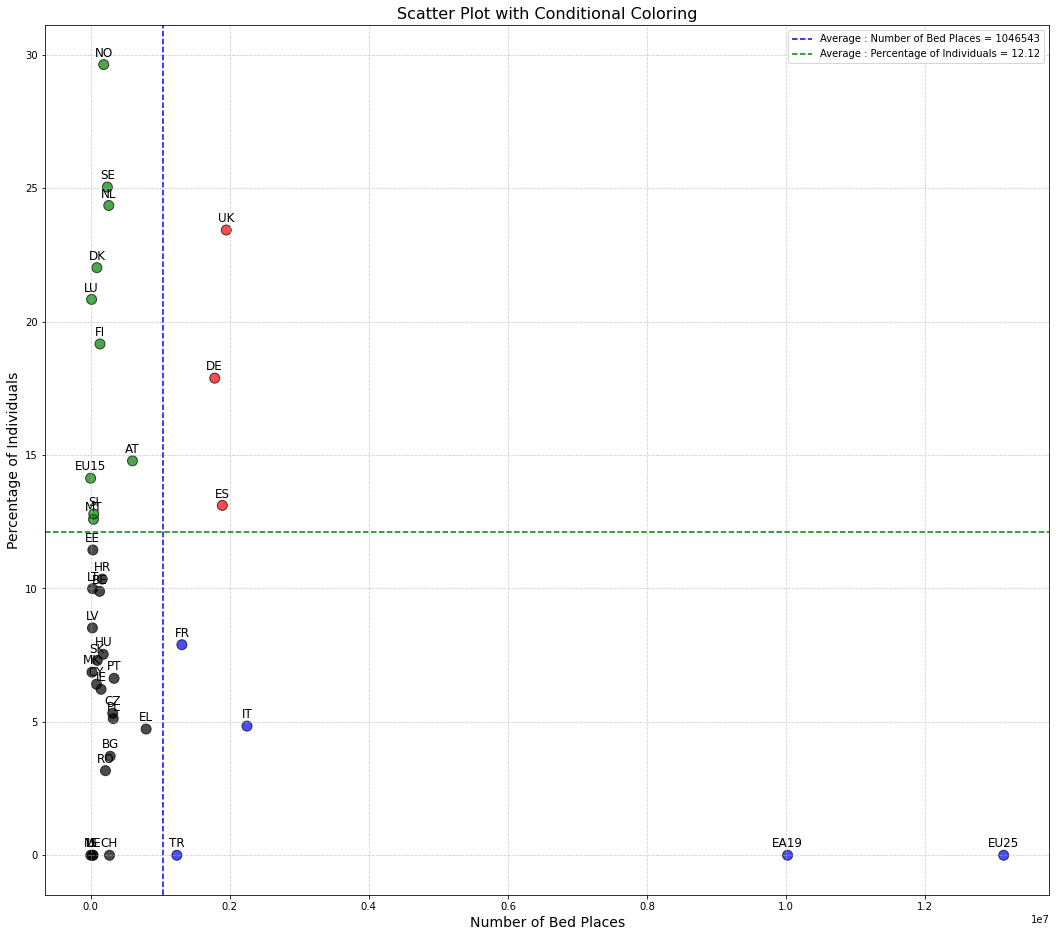

In [ ]:
# 평균값 계산
x_mean = df["num_of_bed_places"].mean()
y_mean = df["percentage_of_individuals"].mean()

# 결측치 채우기
df_fillna = df.fillna(0)

# 마커 색상 조건 적용
colors = []
for i in range(len(df_fillna)):
    x_val = df_fillna["num_of_bed_places"][i]
    y_val = df_fillna["percentage_of_individuals"][i]
    
    if x_val > x_mean and y_val > y_mean:
        colors.append("red")  # 둘 다 평균 초과
    elif x_val > x_mean:
        colors.append("blue")   # x축(Number of Bed Places) 평균 초과
    elif y_val > y_mean:
        colors.append("green")   # y축(Percentage of Individuals) 평균 초과
    else:
        colors.append("black") # 기본

# 산점도 플롯
plt.figure(figsize=(18, 16))
plt.scatter(df_fillna["num_of_bed_places"], df_fillna["percentage_of_individuals"], s=100, c=colors, alpha=0.7, edgecolors="k")

# 국가 코드 라벨 추가
for i, txt in enumerate(df_fillna["country_code"]):
    plt.text(df_fillna["num_of_bed_places"][i], df_fillna["percentage_of_individuals"][i] + 0.3, txt, fontsize=12, ha='center')

# 평균선 추가
plt.axvline(x_mean, color="b", linestyle="--", label=f"Average : Number of Bed Places = {x_mean:.0f}")
plt.axhline(y_mean, color="g", linestyle="--", label=f"Average : Percentage of Individuals = {y_mean:.2f}")

# 축 레이블 및 제목 설정
plt.xlabel("Number of Bed Places", fontsize=14)
plt.ylabel("Percentage of Individuals", fontsize=14)
plt.title("Scatter Plot with Conditional Coloring", fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# 그래프 표시
plt.show()